In [1]:
# install.packages("tidyverse")
library(ggplot2)

In [2]:
dataFull <- read.csv("mdpv4.csv", header=TRUE)
dataFull <- dataFull[dataFull$alpha <= 1, ]

In [3]:
# data0 <- data[data$trial == 0,]
# data1 <- data[data$trial == 1,]
# data2 <- data[data$trial == 2,]

data <- dataFull[dataFull$envSeed == 3701 & dataFull$alpha == 0.4 & dataFull$syncBackups == 1,]

In [4]:
head(data, 2)
print("rows")
nrow(dataFull)
print("cols")
ncol(dataFull)
print("unique alpha")
sort(unique(dataFull$alpha))

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,endScoreRand,aggs,backups,endScoreStochBell,endScore,finalDiff,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
181,10,0.4,0.6,0,4,1,True,3701,0,30300,⋯,1275.329,30294,30300,2119.566,4074.901,0.4650989,0.2937817,22.51547,10,2020
296,10,0.4,0.6,0,8,1,True,3701,1,30300,⋯,1211.888,30235,30300,2105.508,3898.605,0.5170388,0.2622585,23.96695,0,1010


[1] "rows"


[1] 1920

[1] "cols"


[1] 25

[1] "unique alpha"


[1] 0.001 0.002 0.004 0.005 0.008 0.010 0.016 0.020 0.032 0.040 0.050 0.080
[13] 0.100 0.160 0.200 0.320 0.400 0.500 0.800 1.000


Call:
lm(formula = sqDiff ~ ifedP, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.201081 -0.042080 -0.005922  0.003471  0.310982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01031    0.02941   0.351    0.729    
ifedP        0.28535    0.05699   5.007 2.72e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1064 on 28 degrees of freedom
Multiple R-squared:  0.4724,	Adjusted R-squared:  0.4536 
F-statistic: 25.07 on 1 and 28 DF,  p-value: 2.718e-05


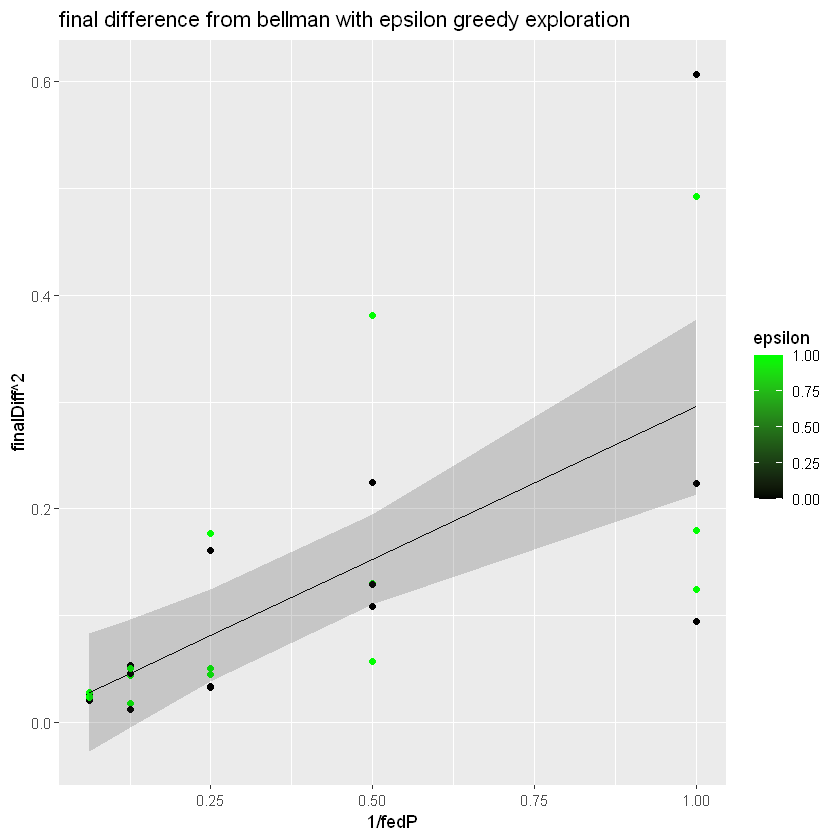

In [5]:
title <- "final difference from bellman with epsilon greedy exploration"
data <- dataFull[dataFull$alpha == 0.1 & (dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
ifedP = 1/data$fedP
sqDiff = data$finalDiff ** 2
model <- lm(sqDiff ~ ifedP, data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=1 / fedP, y=finalDiff ** 2))
p <- p + ggtitle(title)
p <- p + geom_point(aes(colour = epsilon))
p <- p + scale_color_gradientn(colors = c("black", "green"))
p <- p + geom_line(aes(1 / fedP, fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

Warning message in log(data$syncBackups):
"NaNs produced"



Call:
lm(formula = sqDiff ~ ifedP * syncLog, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28769 -0.09472 -0.03824  0.05984  0.51588 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.053712   0.031771  -1.691  0.09346 .  
ifedP          0.358368   0.070581   5.077 1.39e-06 ***
syncLog        0.044900   0.006106   7.353 2.44e-11 ***
ifedP:syncLog -0.049052   0.017285  -2.838  0.00532 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1443 on 122 degrees of freedom
Multiple R-squared:  0.3934,	Adjusted R-squared:  0.3784 
F-statistic: 26.37 on 3 and 122 DF,  p-value: 3.228e-13


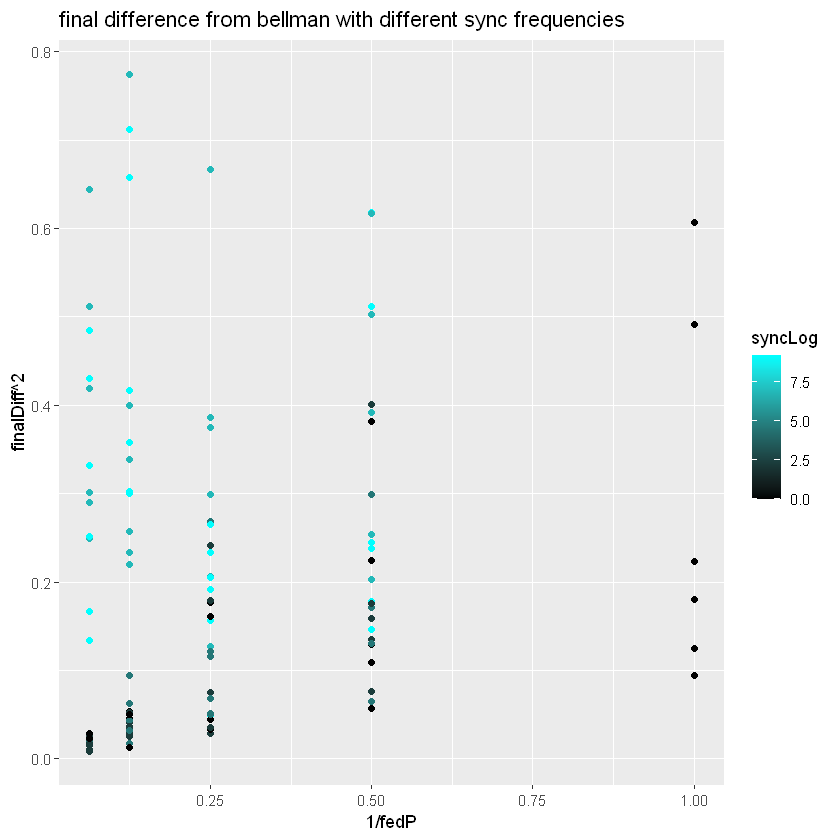

In [6]:
title <- "final difference from bellman with different sync frequencies"
data <- dataFull[dataFull$alpha == 0.1,]
ifedP = 1/data$fedP
sqDiff = data$finalDiff ** 2
syncLog <- log(data$syncBackups)
syncLog[is.nan(syncLog)] <- 0
model <- lm(sqDiff ~ ifedP*syncLog, data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=1 / fedP, y=finalDiff ** 2))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = syncLog))
p <- p + scale_color_gradientn(colors = c("black", "cyan"))
p


Call:
lm(formula = sqDiff ~ ifedP * alpha, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6321 -0.0434 -0.0004  0.1248 21.9416 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.08677    0.10291   0.843 0.399613    
ifedP       -0.54654    0.22458  -2.434 0.015357 *  
alpha       -0.96270    0.28688  -3.356 0.000862 ***
ifedP:alpha 10.89425    0.62573  17.411  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.213 on 428 degrees of freedom
Multiple R-squared:  0.5619,	Adjusted R-squared:  0.5588 
F-statistic:   183 on 3 and 428 DF,  p-value: < 2.2e-16


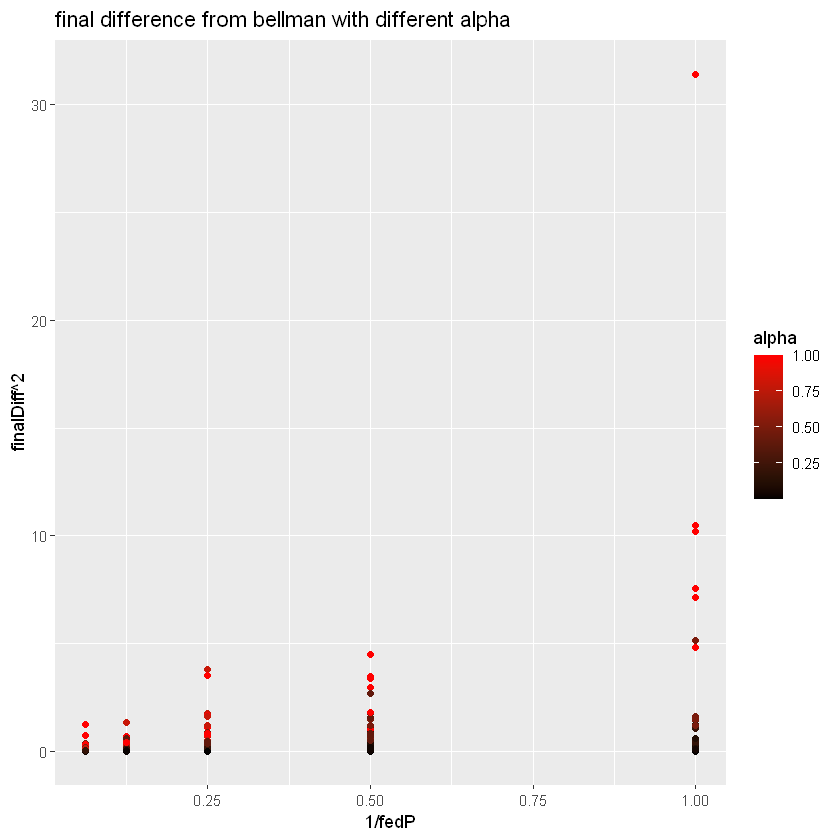

In [7]:
title <- "final difference from bellman with different alpha"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
ifedP = 1/data$fedP
sqDiff = data$finalDiff ** 2
model <- lm(sqDiff ~ ifedP*alpha, data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=1 / fedP, y=finalDiff ** 2))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn(colors = c("black", "red"))
p


Call:
lm(formula = sqDiff ~ alphaifedP, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1572 -0.0119  0.1396  0.1679 22.4165 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.17402    0.06414  -2.713  0.00693 ** 
alphaifedP   9.17087    0.40092  22.875  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.228 on 430 degrees of freedom
Multiple R-squared:  0.5489,	Adjusted R-squared:  0.5479 
F-statistic: 523.2 on 1 and 430 DF,  p-value: < 2.2e-16


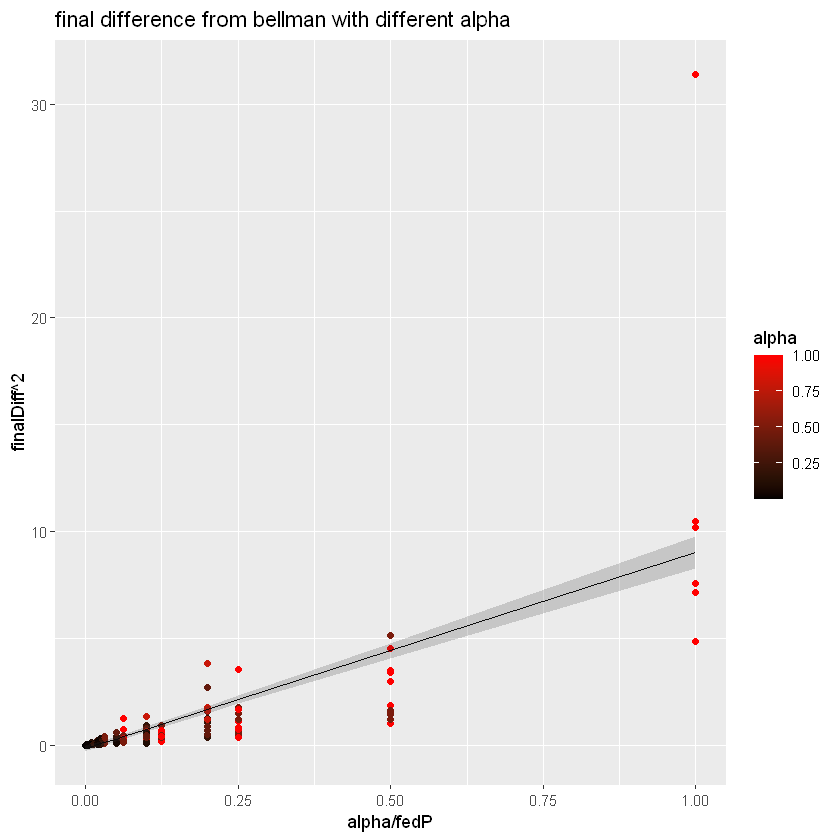

In [8]:
title <- "final difference from bellman with different alpha"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1),]
alphaifedP = data$alpha/data$fedP
sqDiff = data$finalDiff ** 2
model <- lm(sqDiff ~ alphaifedP, data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

p <- ggplot(predict, aes(x=alpha/fedP, y=finalDiff ** 2))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn(colors = c("black", "red"))
p <- p + geom_line(aes(alphaifedP, fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,endScoreRand,aggs,backups,endScoreStochBell,endScore,finalDiff,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
32,10,0.005,0.6,0,16,1,True,3701,0,80800,⋯,1185.387,80596,80800,2132.373,3898.605,0.046355344,0.6923270,22.594047,90,10100
59,10,0.005,0.6,0,1,-1,True,3701,0,50500,⋯,1310.680,0,50500,2147.475,3835.729,0.050978605,0.6329385,23.099771,90,10100
210,10,0.005,0.6,0,4,1,True,3701,1,70700,⋯,1312.867,70674,70700,2198.647,3898.605,0.076964535,0.6628927,20.272297,90,10100
241,10,0.005,0.6,1,8,1,True,3701,0,50500,⋯,1135.738,50443,50500,2190.005,3898.605,0.023955653,0.5989624,14.092454,100,11110
274,10,0.005,0.6,1,16,1,True,3701,2,50500,⋯,1327.228,50335,50500,2168.222,3898.605,0.031215578,0.7064840,12.151424,90,10100
456,10,0.005,0.6,1,4,1,True,3701,1,50500,⋯,1221.823,52510,50500,2109.417,3898.605,0.085942564,0.6733250,12.772860,80,9090
577,10,0.005,0.6,1,1,-1,True,3701,0,40400,⋯,1190.662,0,40400,2126.969,3885.501,0.050852535,0.7055919,10.424412,90,10100
649,10,0.005,0.6,1,8,1,True,3701,2,60600,⋯,1150.744,60482,60600,2060.283,3898.605,0.048335307,0.6325500,12.444319,100,11110
672,10,0.005,0.6,0,4,1,True,3701,0,60600,⋯,1348.077,60585,60600,2129.140,3898.605,0.046621370,0.6585394,22.086867,90,10100



Call:
lm(formula = threshBack ~ ifedP, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1455.27  -431.69   -62.45   537.58  1248.92 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10436.7      173.8   60.05   <2e-16 ***
ifedP          434.4      336.7    1.29    0.208    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 628.9 on 28 degrees of freedom
Multiple R-squared:  0.0561,	Adjusted R-squared:  0.02239 
F-statistic: 1.664 on 1 and 28 DF,  p-value: 0.2076


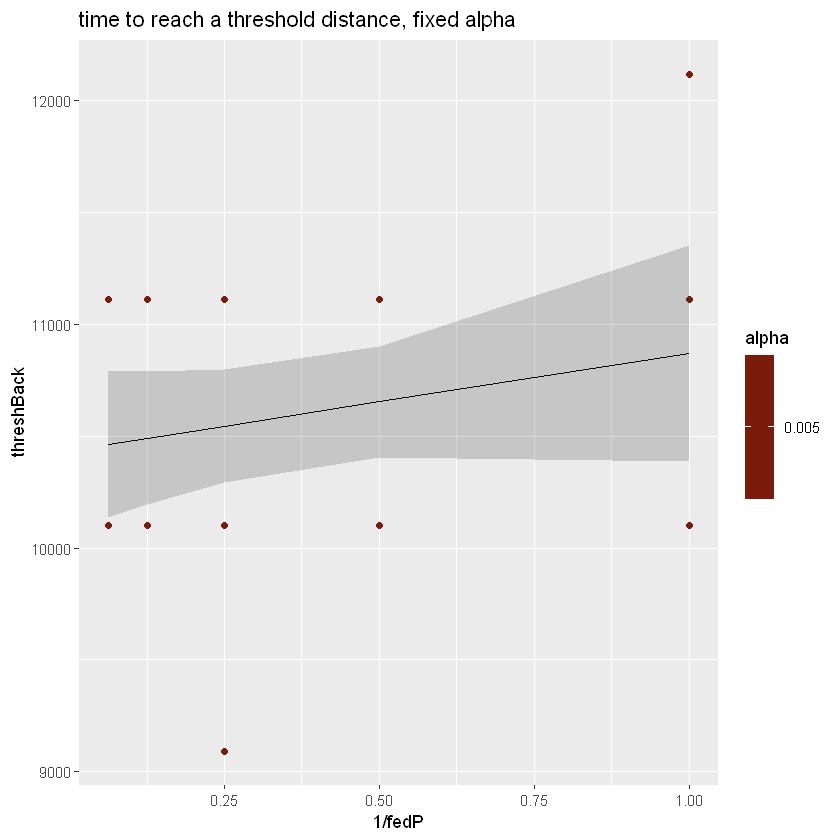

In [9]:
title <- "time to reach a threshold distance, fixed alpha"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$threshDiff ** 2 <= 0.5 & dataFull$alpha == 0.005,]
data

ifedP = 1/data$fedP
model <- lm(threshBack ~ ifedP, data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))


p <- ggplot(predict, aes(x=1/fedP, y=threshBack))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn(colors = c("black", "red"))
p <- p + geom_line(aes(ifedP, fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

,convN,alpha,discount,epsilon,fedP,syncBackups,stochasticPolicy,envSeed,trial,sims,⋯,endScoreRand,aggs,backups,endScoreStochBell,endScore,finalDiff,threshDiff,threshRew,threshEp,threshBack
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
59,10,0.005,0.6,0,1,-1,True,3701,0,50500,⋯,1310.680,0,50500,2147.475,3835.729,0.05097861,0.6329385,23.099771,90,10100
140,10,0.010,0.6,0,2,1,True,3701,1,50500,⋯,1280.225,50366,50500,2067.246,3898.605,0.09233517,0.6228670,19.485508,50,6060
147,10,0.080,0.6,1,16,1,True,3701,1,40400,⋯,1174.775,40251,40400,2141.773,3898.605,0.14811655,0.3072197,11.514895,0,1010
151,10,0.020,0.6,0,4,1,True,3701,1,30300,⋯,1222.580,30059,30300,2155.027,3898.605,0.08561739,0.5852561,24.416277,20,3030
288,10,0.080,0.6,0,16,1,True,3701,1,30300,⋯,1198.584,30225,30300,2186.137,3898.605,0.14485435,0.2377868,17.035205,0,1010
550,10,0.080,0.6,1,16,1,True,3701,0,30300,⋯,1253.069,30164,30300,2114.114,3898.605,0.11190317,0.3124606,12.610502,0,1010
577,10,0.005,0.6,1,1,-1,True,3701,0,40400,⋯,1190.662,0,40400,2126.969,3885.501,0.05085253,0.7055919,10.424412,90,10100
669,10,0.010,0.6,0,2,1,True,3701,2,50500,⋯,1069.512,51270,50500,2101.165,3898.605,0.16935395,0.6424748,21.925531,40,5050
745,10,0.040,0.6,1,8,1,True,3701,1,30300,⋯,1133.126,30212,30300,2169.852,3898.605,0.12860771,0.1883133,15.907769,10,2020



Call:
lm(formula = threshBack ~ ifedP, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-592.33 -118.56  -11.31  253.86 1427.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    491.0      122.8   3.999 0.000421 ***
ifedP        10201.4      237.8  42.892  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 444.2 on 28 degrees of freedom
Multiple R-squared:  0.985,	Adjusted R-squared:  0.9845 
F-statistic:  1840 on 1 and 28 DF,  p-value: < 2.2e-16


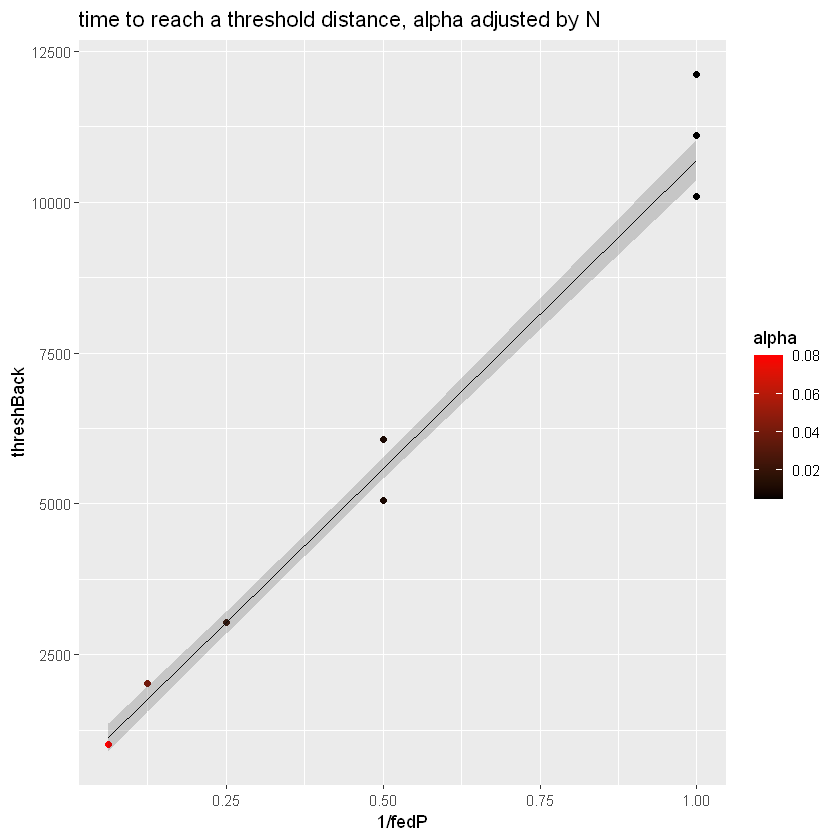

In [10]:
title <- "time to reach a threshold distance, alpha adjusted by N"
data <- dataFull[(dataFull$syncBackups == 1 | dataFull$syncBackups == -1) & dataFull$threshDiff ** 2 <= 0.5 & dataFull$alpha == 0.005 * dataFull$fedP,]
data

ifedP = 1/data$fedP
model <- lm(threshBack ~ ifedP, data)
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))


p <- ggplot(predict, aes(x=1/fedP, y=threshBack))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = alpha)) 
p <- p + scale_color_gradientn(colors = c("black", "red"))
p <- p + geom_line(aes(ifedP, fit))
p <- p + geom_ribbon(aes(ymin=lwr,ymax=upr), alpha=0.2)
p

$D^2 <= (1 – \alpha)^T + \frac{\alpha}{N} + (K-1) \alpha ^2$

[1] "theoretical model"



Call:
lm(formula = sqDiff ~ NTerm + KTerm, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7457 -0.1258 -0.0407 -0.0300 24.4566 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.009e-02  3.482e-02   0.864    0.388    
NTerm       9.068e+00  3.213e-01  28.228   <2e-16 ***
KTerm       7.324e-04  2.515e-05  29.115   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.383 on 1917 degrees of freedom
Multiple R-squared:  0.5364,	Adjusted R-squared:  0.5359 
F-statistic:  1109 on 2 and 1917 DF,  p-value: < 2.2e-16


[1] "added other variables"



Call:
lm(formula = sqDiff ~ NTerm + KTerm + alpha * ifedP * syncBackups * 
    epsilon, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3742 -0.1761  0.0326  0.1011 23.1058 

Coefficients: (1 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -5.252e-02  8.576e-02  -0.612 0.540302    
NTerm                            4.335e+00  7.127e-01   6.083 1.42e-09 ***
KTerm                            1.029e-03  8.532e-05  12.066  < 2e-16 ***
alpha                            1.434e+00  2.390e-01   6.001 2.34e-09 ***
ifedP                           -1.290e-01  2.523e-01  -0.511 0.609070    
syncBackups                      3.485e-05  2.168e-05   1.607 0.108205    
epsilon                          3.363e-02  1.213e-01   0.277 0.781580    
alpha:ifedP                             NA         NA      NA       NA    
alpha:syncBackups               -4.326e-04  9.634e-05  -4.490 7.54e-06 **

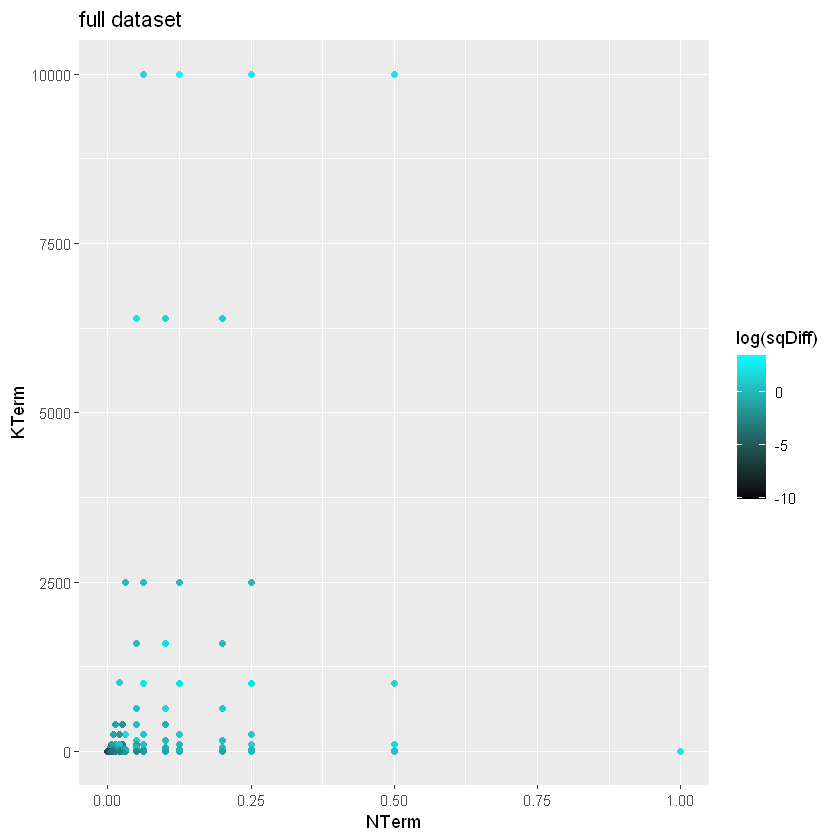

In [11]:
title <- "full dataset"
data <- dataFull
data$syncBackups[data$syncBackups == -1] <- 1

ifedP = 1/data$fedP
NTerm = data$alpha/data$fedP
KTerm = (data$syncBackups - 1) * (data$alpha ** 2)
sqDiff = data$finalDiff ** 2
model <- lm(sqDiff ~ NTerm + KTerm, data)
print("theoretical model")
summary(model)
predict <- cbind(data, predict(model, interval='confidence', newdata=data))

print("added other variables")
modelCofounded <- lm(sqDiff ~ NTerm + KTerm + alpha * ifedP * syncBackups * epsilon, data)
summary(modelCofounded)


p <- ggplot(predict, aes(x=NTerm, y=KTerm))
p <- p + ggtitle(title)
p <- p + geom_point(aes(color = log(sqDiff))) 
p <- p + scale_color_gradientn(colors = c("black", "cyan"))
p